In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import os
from itertools import cycle, islice

import copy

with open('/home/diya/Documents/rat-fes/data/pickles/N5_171001_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N5_171016_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N5_171130_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N6_171026_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171204_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171211_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N5_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N6_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N9_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N9_171121_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N9_171204_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N9_171211_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)

In [2]:

with open('/home/diya/Documents/rat-fes/data/pickles/N5_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N6_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N9_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp)

In [3]:
dimensions=8

In [4]:
day0_decoder, vaffy, test_x, test_y = cp1.decode_angles(X=cp1.apply_PCA(dims=dimensions), metric=1)
day0_pca_transformer = cp1.pca_object
print(np.average(vaffy,1)[1])

0.605


In [5]:
cca_1 = CCAProcessor(cp1, cp2)
cca_2 = CCAProcessor(cp1, cp3)

should be good to align
(7768, 15)
(7768, 5)
(7768, 15)
(7768, 5)
should be good to align
(6449, 15)
(6449, 5)
(6449, 15)
(6449, 5)


In [6]:
cp_list = [cp2, cp3]
cca_list = [cca_1, cca_2]

In [7]:
fixed_vaf=[]
same_vaf = []
for cp in cp_list:
    nada, temp_vaf, nadas, nadax = cp.decode_angles(cp.apply_PCA(dims=dimensions), metric=1)
    same_vaf.append(np.average(temp_vaf, 1)[1])
    temp_x = cp.apply_PCA(dims=dimensions, transformer=day0_pca_transformer)[0]
    temp_y = cp.data['angles'][0]
    temp_x_format, temp_y_format = format_data(temp_x, temp_y)
    nada, temp_vaf, nadas, nadax = decode_kfolds(temp_x_format, temp_y_format, metric=1, preset_h = day0_decoder)
    fixed_vaf.append(np.average(temp_vaf, 1)[1])


In [8]:
cca_vaf = []
for idx, cca_obj in enumerate(cca_list):
    cp1_x_pca, cp2_x_pca = cca_obj.apply_PCA(preset_num_components=dimensions, day_0_transformer = day0_pca_transformer)
    cca_transformer, nada = cca_obj.apply_CCA(cp1_x = cp1_x_pca, cp2_x = cp2_x_pca, preset_num_components=dimensions, pca=True)
    test_x = cca_obj.cp2.apply_PCA(transformer=cca_obj.data['cp2']['pca_transformer'])[0]
    test_y = cca_obj.cp2.data['angles'][0]
    
    trans_x = cca_obj.quick_cca(test_x, cca_transformer, scale=False)
    
    trans_x_format, test_y_format = format_data(trans_x, test_y)
    nada, temp_vaf, nads, nadax = decode_kfolds(trans_x_format, test_y_format, metric=1, preset_h=day0_decoder)
    cca_vaf.append(np.average(temp_vaf, 1)[1])

In [9]:
cca_vaf = np.round(cca_vaf, 2)

In [10]:
same_vaf = np.round(same_vaf, 2)

In [11]:
fixed_vaf = np.round(fixed_vaf, 2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
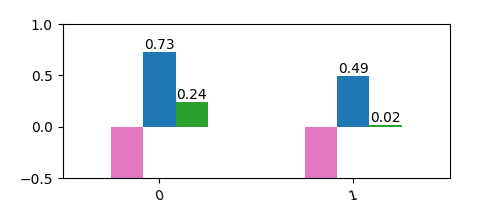

In [12]:
%matplotlib widget
%matplotlib widget

plt.rcParams["figure.figsize"] = (5, 2)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


plot_dict = {}
plot_dict['old decoder'] = fixed_vaf
plot_dict['retrained decoder'] = same_vaf
plot_dict['old decoder on aligned data'] = cca_vaf

#index = ['15 days later', '22 days later']
df = pd.DataFrame(data=plot_dict)

#my_colors = list(islice(cycle(['tab:red', 'tab:blue', 'tab:green','k']), None, len(df)))

  
# plot grouped bar chart
ax = df.plot.bar(rot=15, color=['tab:pink', 'tab:blue', 'tab:green'])
ax.set_ylim(bottom=-.5, top=1)
#ax.set_title('Training various decoders, trying on Day-N data')
#ax.set_ylabel('vaf')
#ax.set_xlabel('number of gait cycles')
ax.legend().remove()
for container in ax.containers:
    diya = ax.bar_label(container)
plt.savefig('/home/diya/Documents/rat-fes/results/sfn_poster/n6across_fig4.pdf', dpi=600)

In [13]:
fixed_vaf

array([-0.75, -0.59])